In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

33.58341279881378 -122.6924725364448
21.134086112719075 -46.1098632608996
-25.54946550232573 40.60990908104171
27.285883061900435 -153.64636690475794
72.01947851283893 -135.93270287564394
-80.0559340057875 77.40165559355967
-39.355602174600634 77.73617684435851
85.96377010802016 -144.83892244086488
-41.429270261023646 -176.22665125714204
-9.56268626254932 -46.78612981186609
55.864451396845254 -20.85628857957039
79.43728437182699 -162.99522048208007
50.09610807211152 -54.990580609838744
-52.780291245092954 31.554302768070784
-62.86922881443502 -137.36074218046835
-32.86874215460243 -63.366368924501
9.29251408345587 -85.25625881450449
-10.813246887226498 74.03718108377129
-32.23399776800735 22.752655137353287
3.972805726442502 51.64235470967091
-52.42077009603042 69.60004212067443
81.78581144789848 -115.0614016440194
-9.55555489793673 109.83999795744336
30.066655413441623 -46.320313657503704
-17.00928198634459 39.314325670859404
85.56214315696647 116.81910103393159
38.58381997112559 86.9

-76.59641377490811 -52.46447434425225
-78.60420154550229 138.625925924539
5.53684238052027 -148.33311130328372
-47.10785234384785 138.64238593810114
79.52593655474882 -11.693417681681666
27.445053280906563 -115.06408132222005
-46.766192977106094 -83.6497393784392
-28.805610052287207 76.39783265210463
-68.52407546347229 173.82674366521275
73.91697294517274 -89.61558414174692
30.604379834655177 20.93084715017511
35.84593034181269 -101.9329847395777
-36.75302374778481 -121.19255742008224
49.52741087029344 19.892764082691258
-23.19558338691067 -124.12032945620078
-13.72980151822486 -20.187906882057007
69.48950205091353 134.3009739686757
83.57663423915488 -135.6957400234291


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f845cc3927a4bf277d3275993c83a68a


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | toliary
City not found. Skipping...
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | morros
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | lewisporte
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | villa maria
Processing Record 16 of Set 1 | puntarenas
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | willowmore
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | bambanglipuro
Processing Record 23 of Set 1 | saint george
Processing

Processing Record 39 of Set 4 | flinders
Processing Record 40 of Set 4 | richmond
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | tazovskiy
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | iwaki
Processing Record 46 of Set 4 | severomorsk
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | mitsamiouli
Processing Record 49 of Set 4 | plymouth
Processing Record 50 of Set 4 | lavrentiya
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | porto murtinho
Processing Record 3 of Set 5 | novovasylivka
Processing Record 4 of Set 5 | kurilsk
Processing Record 5 of Set 5 | chanika
Processing Record 6 of Set 5 | severodvinsk
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | christchurch
Processing Record 10 of Set 5 | merauke
Processing Record 11 of Set 5 | carutapera
Processin

Processing Record 26 of Set 8 | katsuura
Processing Record 27 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 8 | wanaka
Processing Record 29 of Set 8 | jiwani
Processing Record 30 of Set 8 | trairi
Processing Record 31 of Set 8 | kegayli
City not found. Skipping...
Processing Record 32 of Set 8 | turukhansk
Processing Record 33 of Set 8 | iguape
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | gimbi
Processing Record 36 of Set 8 | porto walter
Processing Record 37 of Set 8 | doetinchem
Processing Record 38 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 8 | humaita
Processing Record 40 of Set 8 | kolvereid
Processing Record 41 of Set 8 | ribas do rio pardo
Processing Record 42 of Set 8 | tucumcari
Processing Record 43 of Set 8 | one hundred mile house
City not found. Skipping...
Processing Record 44 of Set 8 | santiago del estero
Processing Record 45 of Set 8 | las palmas
Processing Record 46 of Set 8

Processing Record 12 of Set 12 | morondava
Processing Record 13 of Set 12 | kyra
Processing Record 14 of Set 12 | nioro
Processing Record 15 of Set 12 | ughelli
Processing Record 16 of Set 12 | chifeng
Processing Record 17 of Set 12 | carballo
Processing Record 18 of Set 12 | darab
Processing Record 19 of Set 12 | cam ranh
Processing Record 20 of Set 12 | road town
Processing Record 21 of Set 12 | jintur
Processing Record 22 of Set 12 | san isidro
Processing Record 23 of Set 12 | chilca
Processing Record 24 of Set 12 | kyabram
Processing Record 25 of Set 12 | correia pinto
Processing Record 26 of Set 12 | guilin
Processing Record 27 of Set 12 | wewak
Processing Record 28 of Set 12 | baillif
Processing Record 29 of Set 12 | nhulunbuy
Processing Record 30 of Set 12 | emirdag
Processing Record 31 of Set 12 | smithers
Processing Record 32 of Set 12 | san cristobal
Processing Record 33 of Set 12 | bismarck
Processing Record 34 of Set 12 | kieta
Processing Record 35 of Set 12 | ihosy
Process

In [16]:
len(city_data)

556

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.64,-120.46,59.00,67,90,12.75,US,2020-04-20 01:37:18
1,Bathsheba,13.22,-59.52,80.60,69,20,17.22,BB,2020-04-20 01:37:18
2,Kahului,20.89,-156.47,82.40,51,40,12.75,US,2020-04-20 01:37:18
3,Tuktoyaktuk,69.45,-133.04,10.40,85,90,9.17,CA,2020-04-20 01:37:19
4,Busselton,-33.65,115.33,69.01,42,95,22.88,AU,2020-04-20 01:37:19
5,Mahebourg,-20.41,57.70,77.00,83,75,12.75,MU,2020-04-20 01:37:19
6,Barrow,71.29,-156.79,12.20,78,90,6.93,US,2020-04-20 01:37:19
7,Vaini,-21.20,-175.20,84.20,74,20,11.41,TO,2020-04-20 01:37:19
8,Morros,-9.45,-46.30,72.45,80,87,4.61,BR,2020-04-20 01:37:19
9,Vestmannaeyjar,63.44,-20.27,46.22,94,100,27.13,IS,2020-04-20 01:37:20


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2020-04-20 01:37:18,34.64,-120.46,59.00,67,90,12.75
1,Bathsheba,BB,2020-04-20 01:37:18,13.22,-59.52,80.60,69,20,17.22
2,Kahului,US,2020-04-20 01:37:18,20.89,-156.47,82.40,51,40,12.75
3,Tuktoyaktuk,CA,2020-04-20 01:37:19,69.45,-133.04,10.40,85,90,9.17
4,Busselton,AU,2020-04-20 01:37:19,-33.65,115.33,69.01,42,95,22.88
5,Mahebourg,MU,2020-04-20 01:37:19,-20.41,57.70,77.00,83,75,12.75
6,Barrow,US,2020-04-20 01:37:19,71.29,-156.79,12.20,78,90,6.93
7,Vaini,TO,2020-04-20 01:37:19,-21.20,-175.20,84.20,74,20,11.41
8,Morros,BR,2020-04-20 01:37:19,-9.45,-46.30,72.45,80,87,4.61
9,Vestmannaeyjar,IS,2020-04-20 01:37:20,63.44,-20.27,46.22,94,100,27.13


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/19/20'

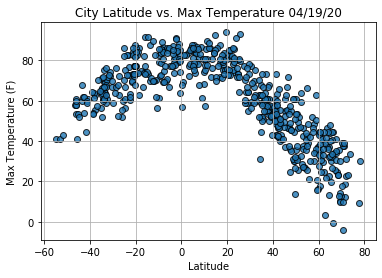

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

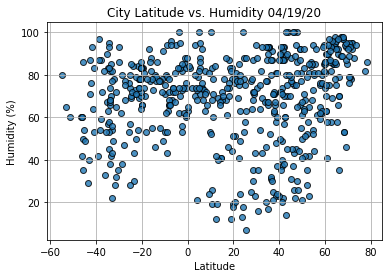

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

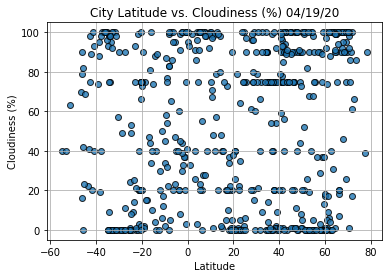

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

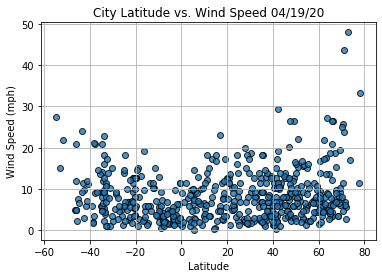

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()